In [19]:
import pandas as pd 
from sklearn.feature_selection import VarianceThreshold
import sknetwork

## Data loading (Simple dataset)
We will load all needed dataset in our program.

In [20]:
users_features = pd.read_csv("data/Social_spammers_dataset/users_features/features.csv")
labels = pd.read_csv("data/Social_spammers_dataset/users/coded_ids_labels_train.csv")
code_ids_label = pd.read_csv("data/Social_spammers_dataset/users/coded_ids.csv")
users_features = pd.merge(users_features, code_ids_label, on='user_id')

In [21]:
users_features_with_labels = pd.merge(users_features, labels, on='coded_id')

## Data Loading (Graph dataset)

In [22]:
graph = pd.read_csv("./data/Social_spammers_dataset/graphs/c_combined_edges_w_1_s_0.9.csv")

## Data preprocessing

In [23]:
users_features_with_labels.shape

(686, 147)

In [24]:
users_features_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Columns: 147 entries, active_tweeting_frequency_per_day to label
dtypes: bool(2), float64(93), int64(44), object(8)
memory usage: 783.8+ KB


In [25]:
# total null values
users_features_with_labels.isna().sum().sum()

1022

In [26]:
users_features_with_labels['label'].isna().sum()

0

In [27]:
#all columns with null values
users_features_with_labels.isna().sum()


active_tweeting_frequency_per_day      0
adjusted_nb_of_uses_of_hashtag         0
adjusted_nb_of_uses_of_mention         0
adjusted_nb_of_uses_of_sources         0
adjusted_nb_of_uses_of_url             0
                                    ... 
urls_used_on_average                   0
user_id                                0
utc_offset                           168
coded_id                               0
label                                  0
Length: 147, dtype: int64

In [28]:
# column content null values
df1 = users_features_with_labels.iloc[0:0,]
columns = list(df1)
xx=[]
yy=[]
for col in columns :
    s = users_features_with_labels[col].isna().sum()
    if (s != 0):
        print (col)
        xx.append(col)
        print(s)
        yy.append(s)
    else:
        pass
users_features_with_labels.shape

spam_in_screen_name
686
time_zone
168
utc_offset
168


(686, 147)

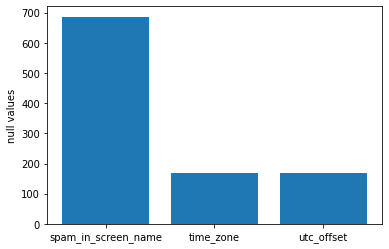

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
plt.bar(xx,yy,align='center') # A bar chart
#plt.xlabel('percentage')
plt.ylabel('null values')
#for i in range(len(y)):
#    plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("null_values.png", dpi=100)

In [30]:

sns.countplot(x='P[0.1]',data=df,palette='terrain',hue= 'MAgP')

NameError: name 'sns' is not defined

In [31]:
users_features_with_labels[['time_zone','utc_offset']].head(30)

,time_zone,utc_offset
0,Hawaii,-36000.0
1,Riyadh,10800.0
2,Pacific Time (US & Canada),-28800.0
3,Pacific Time (US & Canada),-28800.0
4,Central Time (US & Canada),-21600.0
5,Pacific Time (US & Canada),-28800.0
6,Riyadh,10800.0
7,NaN,NaN
8,NaN,NaN
9,Riyadh,10800.0


In [32]:
#Frequent Category Imputation
#This technique is used to fill the missing values in categorical data. 
#In this, we replace NaN values with the most Frequent label. 
#First, we find the most frequent label and then replace NaN with it.

def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0] ##Most Frequent
    df[variable].fillna(most_frequent_category,inplace=True) 
for feature in ['time_zone']:           ##List of Categorical Features
    impute_nan(users_features_with_labels,feature)

for feature in ['utc_offset']:           ##List of Categorical Features
    impute_nan(users_features_with_labels,feature)

users_features_with_labels[['time_zone','utc_offset']].head(30)

,time_zone,utc_offset
0,Hawaii,-36000.0
1,Riyadh,10800.0
2,Pacific Time (US & Canada),-28800.0
3,Pacific Time (US & Canada),-28800.0
4,Central Time (US & Canada),-21600.0
5,Pacific Time (US & Canada),-28800.0
6,Riyadh,10800.0
7,Eastern Time (US & Canada),-14400.0
8,Eastern Time (US & Canada),-14400.0
9,Riyadh,10800.0


In [33]:
## all values of column spam_in_screen_name are null
users_features_with_labels['spam_in_screen_name'] 

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
681   NaN
682   NaN
683   NaN
684   NaN
685   NaN
Name: spam_in_screen_name, Length: 686, dtype: float64

In [34]:
#so we can delete this column spam_in_screen_name
users = users_features_with_labels.drop(['spam_in_screen_name'], axis=1)


In [35]:
columns

['active_tweeting_frequency_per_day',
 'adjusted_nb_of_uses_of_hashtag',
 'adjusted_nb_of_uses_of_mention',
 'adjusted_nb_of_uses_of_sources',
 'adjusted_nb_of_uses_of_url',
 'age',
 'avg_intertweet_times',
 'avg_intertweet_times_seconds',
 'content_duration_days',
 'date_newest_tweet',
 'date_oldest_tweet',
 'default_profile',
 'default_profile_image',
 'diversity_index_of_hashtags',
 'diversity_index_of_mentions',
 'diversity_index_of_sources',
 'diversity_index_of_urls',
 'favourites_count',
 'followees_per_followers_sq',
 'followers_count',
 'followers_count_minus_2002',
 'followers_per_followees',
 'friends_count',
 'friends_count_minus_2002',
 'hashtags_used_on_average',
 'lang',
 'len_description',
 'len_screen_name',
 'max_intertweet_times',
 'max_intertweet_times_seconds',
 'max_nb_characters_per_tweet',
 'max_nb_favourites_per_tweet',
 'max_nb_hashtags_per_tweet',
 'max_nb_hashtags_per_word_in_the_tweet',
 'max_nb_mentions_per_tweet',
 'max_nb_mentions_per_word_in_the_tweet',

In [36]:
# column content null values
df1 = users.iloc[0:0,]
columns = list(df1)
for col in columns :
    s = users[col].isna().sum()
    if (s != 0):
        print (col)
        print(s)
    else:
        pass

## Exploration of data

In [37]:
users.head()

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,...,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset,coded_id,label
0,0.055,2.600,5.308,21.087,2.333,2186,19 days 05:12:37.409091000,1660357.0,422,26/12/2017 14:45:25,...,Hawaii,5.396,10,5,5,2.000,494199648,-36000.0,203,0
1,40.000,9.938,8.329,400.000,1.000,2474,0 days 00:39:20.897243000,2361.0,10,10/02/2018 17:00:37,...,Riyadh,35.167,19,2,1,1.000,293270197,10800.0,138,0
2,0.334,2.600,2.412,55.284,36.885,3220,16 days 16:04:30.509317000,1440271.0,485,04/07/2011 03:37:09,...,Pacific Time (US & Canada),0.051,0,0,20,2.400,33046208,-28800.0,148,1
3,4.494,0.000,0.000,203.380,1.000,816,0 days 05:24:08.857143000,19449.0,89,09/02/2018 12:43:09,...,Pacific Time (US & Canada),23.863,0,0,20,1.000,4217668515,-28800.0,182,1
4,80.000,395.000,0.000,400.000,174.673,1174,0 days 00:19:59.997494000,1200.0,5,10/02/2018 17:15:00,...,Central Time (US & Canada),46.056,0,19,20,1.908,2909542704,-21600.0,135,1


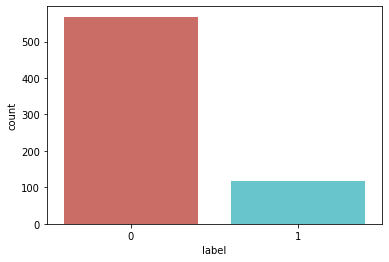

In [38]:
import seaborn as sb  
%matplotlib inline  
sb_label = sb.countplot(x='label', data = users, palette = 'hls')
sb_label
sb_label.figure.savefig("label.png")

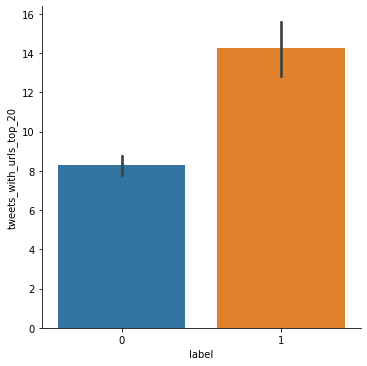

In [60]:
sb_to20 = sb.catplot(y='tweets_with_urls_top_20', x= 'label', kind="bar" ,data = users)
sb_to20
sb_to20.savefig("top20.png")

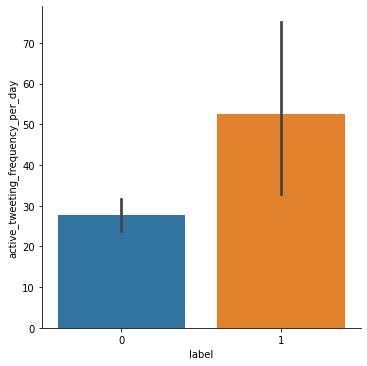

In [70]:
sb_to20 = sb.catplot(y='active_tweeting_frequency_per_day', x= 'label', kind="bar" ,data = users)
sb_to20
sb_to20.savefig("active_tweeting_frequency_per_day.png")

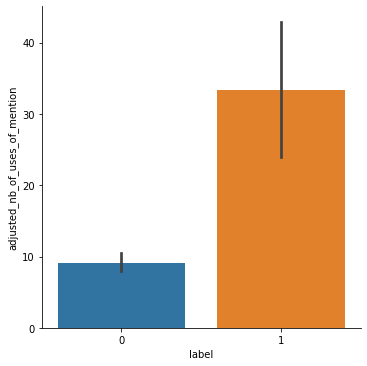

In [71]:
sb_to20 = sb.catplot(y='adjusted_nb_of_uses_of_mention', x= 'label', kind="bar" ,data = users)
sb_to20
sb_to20.savefig("adjusted_nb_of_uses_of_mention.png")

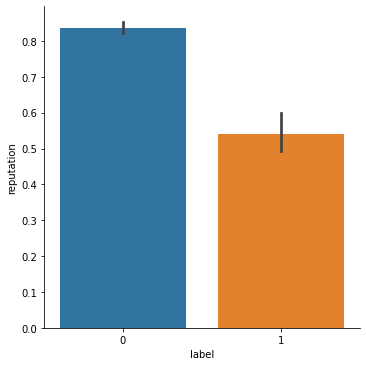

In [72]:
sb_to20 = sb.catplot(y='reputation', x= 'label', kind="bar" ,data = users)
sb_to20
sb_to20.savefig("reputation.png")

In [73]:
sb.set_theme(style="ticks")
#label = sb.load_dataset("exercise")
g = sb.catplot(x="reputation", y="label", hue="kind", data=users)
g

ValueError: Could not interpret input 'kind'

In [40]:
float_columns = []
int_columns = []
boolean_columns = []
else_columns = []
object_columns = []
for i in columns :
    print (users[i].head(5))
    if users[i].dtype == 'float64':
        float_columns.append(i)
        print (users[i].dtype)
    if users[i].dtype == 'int64':
        int_columns.append(i)
        print (users[i].dtype)
    if users[i].dtype == 'bool':
        boolean_columns.append(i)
        print (users[i].dtype)
    if users[i].dtype == 'object':
        object_columns.append(i)
        print (users[i].dtype)
    else :
        else_columns.append(i)
        print (users[i].dtype)

0     0.055
1    40.000
2     0.334
3     4.494
4    80.000
Name: active_tweeting_frequency_per_day, dtype: float64
float64
float64
0      2.600
1      9.938
2      2.600
3      0.000
4    395.000
Name: adjusted_nb_of_uses_of_hashtag, dtype: float64
float64
float64
0    5.308
1    8.329
2    2.412
3    0.000
4    0.000
Name: adjusted_nb_of_uses_of_mention, dtype: float64
float64
float64
0     21.087
1    400.000
2     55.284
3    203.380
4    400.000
Name: adjusted_nb_of_uses_of_sources, dtype: float64
float64
float64
0      2.333
1      1.000
2     36.885
3      1.000
4    174.673
Name: adjusted_nb_of_uses_of_url, dtype: float64
float64
float64
0    2186
1    2474
2    3220
3     816
4    1174
Name: age, dtype: int64
int64
int64
0    19 days 05:12:37.409091000
1     0 days 00:39:20.897243000
2    16 days 16:04:30.509317000
3     0 days 05:24:08.857143000
4     0 days 00:19:59.997494000
Name: avg_intertweet_times, dtype: object
object
0    1660357.0
1       2361.0
2    1440271.0
3     

Name: time_zone, dtype: object
object
0     5.396
1    35.167
2     0.051
3    23.863
4    46.056
Name: tweeting_frequency_per_day, dtype: float64
float64
float64
0    10
1    19
2     0
3     0
4     0
Name: tweets_with_at_top_20, dtype: int64
int64
int64
0     5
1     2
2     0
3     0
4    19
Name: tweets_with_hashtags_top_20, dtype: int64
int64
int64
0     5
1     1
2    20
3    20
4    20
Name: tweets_with_urls_top_20, dtype: int64
int64
int64
0    2.000
1    1.000
2    2.400
3    1.000
4    1.908
Name: urls_used_on_average, dtype: float64
float64
float64
0     494199648
1     293270197
2      33046208
3    4217668515
4    2909542704
Name: user_id, dtype: int64
int64
int64
0   -36000.0
1    10800.0
2   -28800.0
3   -28800.0
4   -21600.0
Name: utc_offset, dtype: float64
float64
float64
0    203
1    138
2    148
3    182
4    135
Name: coded_id, dtype: int64
int64
int64
0    0
1    0
2    1
3    1
4    1
Name: label, dtype: int64
int64
int64


In [41]:
for i in columns :
    print(i)
    print (users[i].head(5))
    l=[]
    if (users[i] != 'int64' or users[i] != 'float64'):
        l.append(i)

active_tweeting_frequency_per_day
0     0.055
1    40.000
2     0.334
3     4.494
4    80.000
Name: active_tweeting_frequency_per_day, dtype: float64


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [42]:
else_columns

['active_tweeting_frequency_per_day',
 'adjusted_nb_of_uses_of_hashtag',
 'adjusted_nb_of_uses_of_mention',
 'adjusted_nb_of_uses_of_sources',
 'adjusted_nb_of_uses_of_url',
 'age',
 'avg_intertweet_times_seconds',
 'content_duration_days',
 'default_profile',
 'default_profile_image',
 'diversity_index_of_hashtags',
 'diversity_index_of_mentions',
 'diversity_index_of_sources',
 'diversity_index_of_urls',
 'favourites_count',
 'followees_per_followers_sq',
 'followers_count',
 'followers_count_minus_2002',
 'followers_per_followees',
 'friends_count',
 'friends_count_minus_2002',
 'hashtags_used_on_average',
 'len_description',
 'len_screen_name',
 'max_intertweet_times_seconds',
 'max_nb_characters_per_tweet',
 'max_nb_favourites_per_tweet',
 'max_nb_hashtags_per_tweet',
 'max_nb_hashtags_per_word_in_the_tweet',
 'max_nb_mentions_per_tweet',
 'max_nb_mentions_per_word_in_the_tweet',
 'max_nb_retweets_per_tweet',
 'max_nb_symbols_per_tweet',
 'max_nb_symbols_per_word_in_the_tweet',
 '

In [43]:
object_columns

['avg_intertweet_times',
 'date_newest_tweet',
 'date_oldest_tweet',
 'lang',
 'max_intertweet_times',
 'min_intertweet_times',
 'std_intertweet_times',
 'time_zone']

In [44]:
float_columns

['active_tweeting_frequency_per_day',
 'adjusted_nb_of_uses_of_hashtag',
 'adjusted_nb_of_uses_of_mention',
 'adjusted_nb_of_uses_of_sources',
 'adjusted_nb_of_uses_of_url',
 'avg_intertweet_times_seconds',
 'diversity_index_of_hashtags',
 'diversity_index_of_mentions',
 'diversity_index_of_sources',
 'diversity_index_of_urls',
 'followees_per_followers_sq',
 'followers_per_followees',
 'hashtags_used_on_average',
 'max_intertweet_times_seconds',
 'max_nb_hashtags_per_word_in_the_tweet',
 'max_nb_mentions_per_word_in_the_tweet',
 'max_nb_symbols_per_word_in_the_tweet',
 'max_nb_urls_per_word_in_the_tweet',
 'mean_nb_characters_per_tweet',
 'mean_nb_favourites_per_tweet',
 'mean_nb_hashtags_per_tweet',
 'mean_nb_hashtags_per_word_in_the_tweet',
 'mean_nb_mentions_per_tweet',
 'mean_nb_mentions_per_word_in_the_tweet',
 'mean_nb_retweets_per_tweet',
 'mean_nb_symbols_per_tweet',
 'mean_nb_symbols_per_word_in_the_tweet',
 'mean_nb_urls_per_tweet',
 'mean_nb_urls_per_word_in_the_tweet',
 'm

In [45]:
boolean_columns

['default_profile', 'default_profile_image']

In [46]:
int_columns

['age',
 'content_duration_days',
 'favourites_count',
 'followers_count',
 'followers_count_minus_2002',
 'friends_count',
 'friends_count_minus_2002',
 'len_description',
 'len_screen_name',
 'max_nb_characters_per_tweet',
 'max_nb_favourites_per_tweet',
 'max_nb_hashtags_per_tweet',
 'max_nb_mentions_per_tweet',
 'max_nb_retweets_per_tweet',
 'max_nb_symbols_per_tweet',
 'max_nb_urls_per_tweet',
 'max_nb_words_per_tweet',
 'min_nb_characters_per_tweet',
 'min_nb_favourites_per_tweet',
 'min_nb_hashtags_per_tweet',
 'min_nb_mentions_per_tweet',
 'min_nb_retweets_per_tweet',
 'min_nb_symbols_per_tweet',
 'min_nb_urls_per_tweet',
 'min_nb_words_per_tweet',
 'nb_collected_tweets',
 'nb_hashtags',
 'nb_lists',
 'nb_mentions',
 'nb_unique_hashtags',
 'nb_unique_mentions',
 'nb_unique_sources',
 'nb_unique_urls',
 'nb_urls',
 'numerals_in_screen_name',
 'replicates',
 'statuses_count',
 'time_since_newest_tweet_days',
 'tweets_with_at_top_20',
 'tweets_with_hashtags_top_20',
 'tweets_with_

In [47]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
#labelencoder.fit(users['Name'])

categorical_cols = boolean_columns + object_columns

# apply le on categorical feature columns
users[categorical_cols] = users[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))
users[categorical_cols].head(10)

,default_profile,default_profile_image,avg_intertweet_times,date_newest_tweet,date_oldest_tweet,lang,max_intertweet_times,min_intertweet_times,std_intertweet_times,time_zone
0,0,0,663,659,657,0,428,8,667,35
1,0,0,125,138,662,4,366,2,228,63
2,1,0,662,16,87,4,644,7,673,59
3,1,0,465,50,230,0,676,0,547,59
4,1,0,64,148,83,4,19,0,26,25
5,0,0,9,17,47,4,10,0,10,59
6,0,0,482,39,152,0,134,55,372,63
7,1,0,297,678,604,4,557,0,582,29
8,1,0,641,68,16,4,664,2,658,29
9,0,0,314,206,437,4,657,0,507,63


In [48]:
users.head(10)

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,...,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset,coded_id,label
0,0.055,2.600,5.308,21.087,2.333,2186,663,1660357.0,422,659,...,35,5.396,10,5,5,2.000,494199648,-36000.0,203,0
1,40.000,9.938,8.329,400.000,1.000,2474,125,2361.0,10,138,...,63,35.167,19,2,1,1.000,293270197,10800.0,138,0
2,0.334,2.600,2.412,55.284,36.885,3220,662,1440271.0,485,16,...,59,0.051,0,0,20,2.400,33046208,-28800.0,148,1
3,4.494,0.000,0.000,203.380,1.000,816,465,19449.0,89,50,...,59,23.863,0,0,20,1.000,4217668515,-28800.0,182,1
4,80.000,395.000,0.000,400.000,174.673,1174,64,1200.0,5,148,...,25,46.056,0,19,20,1.908,2909542704,-21600.0,135,1
5,400.000,88.713,0.000,400.000,1.344,2002,9,299.0,1,17,...,59,395.738,0,16,20,1.027,767090622,-28800.0,243,1
6,3.000,0.000,1.000,3.000,0.000,1950,482,22343.0,1,39,...,63,2.839,3,0,0,0.000,871372070,10800.0,258,0
7,12.903,28.119,0.000,400.000,1.172,890,297,6812.0,31,678,...,29,445.565,0,16,20,1.031,3458288593,-14400.0,161,1
8,0.691,6.251,18.173,347.061,27.340,1432,641,125425.0,802,68,...,29,4.410,14,5,7,2.541,2384230429,-14400.0,79,0
9,11.735,3.017,6.249,399.000,1.529,2532,314,7522.0,34,206,...,63,34.954,18,5,3,1.130,262471495,10800.0,107,0


In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Columns: 146 entries, active_tweeting_frequency_per_day to label
dtypes: float64(92), int32(8), int64(46)
memory usage: 786.4 KB


In [50]:
# features
X = users.iloc[:,0:145]
X

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,...,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset,coded_id
0,0.055,2.600,5.308,21.087,2.333,2186,663,1660357.0,422,659,...,1.533333,35,5.396,10,5,5,2.000,494199648,-36000.0,203
1,40.000,9.938,8.329,400.000,1.000,2474,125,2361.0,10,138,...,0.000000,63,35.167,19,2,1,1.000,293270197,10800.0,138
2,0.334,2.600,2.412,55.284,36.885,3220,662,1440271.0,485,16,...,80.466667,59,0.051,0,0,20,2.400,33046208,-28800.0,148
3,4.494,0.000,0.000,203.380,1.000,816,465,19449.0,89,50,...,0.033333,59,23.863,0,0,20,1.000,4217668515,-28800.0,182
4,80.000,395.000,0.000,400.000,174.673,1174,64,1200.0,5,148,...,0.000000,25,46.056,0,19,20,1.908,2909542704,-21600.0,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.995,1.000,2.256,163.250,1.013,2738,610,87585.0,201,447,...,0.066667,67,1.440,6,0,15,1.006,138282579,32400.0,747
682,100.000,42.436,35.122,98.490,1.000,3405,41,896.0,2,463,...,0.066667,29,23.174,20,19,1,1.000,15290441,-14400.0,541
683,2.020,0.000,0.000,136.000,1.000,2249,557,43014.0,99,473,...,0.066667,72,2.512,0,0,11,1.000,365303324,32400.0,474
684,1.418,1.912,5.804,147.610,1.077,3137,585,61605.0,141,235,...,0.100000,48,7.198,19,8,6,1.040,26738483,3600.0,435


In [51]:
# label
Y = users.iloc[:,145]
Y

0      0
1      0
2      1
3      1
4      1
      ..
681    0
682    0
683    0
684    0
685    0
Name: label, Length: 686, dtype: int64

In [52]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, \
    accuracy_score, f1_score

def evaluation(Y_test,Y_predict):
   print(' Accuracy:', round(accuracy_score(Y_test, Y_predict),4)*100,"%")
   print(' Recall:', round(recall_score(Y_test, Y_predict),2)*100,"%")
   print(' Precision:', round(precision_score(Y_test,Y_predict ),4)*100,"%")
   print(' F1 score:', round(f1_score(Y_test, Y_predict),4)*100,"%")

In [53]:
##KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
clfKNeighborsClassifier=KNeighborsClassifier(n_neighbors=3)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100,shuffle="true")

modelKNeighborsClassifier=clfKNeighborsClassifier.fit(X_train,Y_train)
Y_predict=modelKNeighborsClassifier.predict(X_test)
print("*******Classification avec KNeighborsClassifier*******")
from sklearn.naive_bayes import  MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import VotingClassifierevaluation(Y_test,Y_predict)

*******Classification avec KNeighborsClassifier*******


In [54]:
from sklearn.naive_bayes import  MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

#DecisionTree
clfDecisionTreeClassifier=DecisionTreeClassifier()
modelDecisionTreeClassifier=clfDecisionTreeClassifier.fit(X_train,Y_train)
Y_predict=modelDecisionTreeClassifier.predict(X_test)
print("*******Classification avec DecisionTreeClassifier*******")
evaluation(Y_test,Y_predict)


*******Classification avec DecisionTreeClassifier*******
 Accuracy: 96.38 %
 Recall: 88.0 %
 Precision: 91.3 %
 F1 score: 89.36 %


In [55]:
from sklearn.model_selection import StratifiedKFold,GroupKFold, cross_val_score

cv = StratifiedKFold(5)
cross_val_score(DecisionTreeClassifier(),X,Y,cv=cv)


array([0.47826087, 0.96350365, 0.99270073, 0.96350365, 0.96350365])

In [56]:
cross_val_score(KNeighborsClassifier(),X,Y,cv=cv)

array([0.7826087 , 0.87591241, 0.83211679, 0.8540146 , 0.82481752])

In [57]:
cross_val_score(LogisticRegression(),X,Y,cv=cv)

array([0.82608696, 0.16788321, 0.16788321, 0.82481752, 0.17518248])

In [58]:
cross_val_score(BernoulliNB(),X,Y,cv=cv)

array([0.8115942 , 0.87591241, 0.91240876, 0.86861314, 0.90510949])

In [59]:
cross_val_score(LinearSVC(),X,Y,cv=cv)

c:\program files\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

array([0.82608696, 0.88321168, 0.82481752, 0.86861314, 0.75182482])

In [70]:
##############
cv = GroupKFold(5).get_n_splits(X,Y,groups=144)
cross_val_score(DecisionTreeClassifier(),X,Y,cv=cv)

array([0.52173913, 0.95620438, 0.98540146, 0.95620438, 0.96350365])

In [ ]:
VarianceThreshold(threshold=(.8 * (1 - .8)))

## Feature Selection

## Data Analysis part

##  Models

## Evaluation of models